# Practica 3: Machine Learning

## Index
1. [Introducció](#1-introducció)
2. [Anàlisi de les dades](#2-anàlisi-de-les-dades)
    - [Comprensió de les variables](#21-comprensió-de-les-variables)
    - [Anàlisi de la distribució de la variable objectiu](#22-anàlisi-de-la-distribució-de-la-variable-objectiu)
    - [Gestió de valors nuls](#23-gestió-de-valors-nuls)
    - [Anàlisi de variables numèriques](#24-anàlisi-de-variables-numèriques)
    - [Anàlisi de variables categòriques](#25-anàlisi-de-variables-categòriques)
    - [Relació amb la variable objectiu](#26-relació-amb-la-variable-objectiu)
    - [Identificació de tendències i patrons](#27-identificació-de-tendències-i-patrons)
    - [Divisió de les dades](#28-divisió-de-les-dades)
3. [Entrenament i resultats per a cada model](#3-entrenament-i-resultats-per-a-cada-model)
   - [Perceptró](#31-perceptró)
   - [Regressió logística](#regressió-logística)
   - [Màquines de vectors de suport (SVM)](#màquines-de-vectors-de-suport-svm)
   - [Arbres de decisió](#arbres-de-decisions)
   - [Boscos aleatoris](#boscos-aleatoris)
4. [Discussió de resultats](#discussió-de-resultats)

# 1. Introducció
En aquesta pràctica, aplicarem diverses tècniques d'aprenentatge automàtic per resoldre un problema de classificació utilitzant el conjunt de dades **Forest Cover Type Dataset**. Aquest conjunt de dades recull informació detallada sobre el sòl i la vegetació del **Bosc Nacional de Roosevelt**, situat als Estats Units, i inclou més de mig milió de mostres descrites per 54 atributs, com ara l'altitud, la inclinació del terreny, el tipus de sòl i el tipus d'ombra, entre altres característiques.

L'objectiu principal de la pràctica és desenvolupar models d'aprenentatge automàtic capaços de predir amb alta precisió el tipus de coberta forestal associat a cada mostra. Aquest és un problema de classificació multiclasse amb 7 categories diferents, les quals representen tipus específics de vegetació en el bosc.

Per aconseguir aquest objectiu, es farà ús de diverses tècniques d'anàlisi de dades i entrenament de models, incloent la selecció de característiques, l'ajust d'hiperparàmetres, l'entrenament i la validació dels models, així com l'anàlisi dels resultats obtinguts. A més, compararem diferents algorismes de classificació per determinar quin ofereix els millors resultats per a aquest conjunt de dades.


# 2. Anàlisi de les dades
Primerament, importarem les llibreries i dades necessaries per la preparació de les dades.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurar llavor per a reproduïbilitat
seed = 42

# Configurar mètrica a maximitzar en la cerca d'hiperparàmetres, el fet d'emprar accuracy donarà un millor resultat a classes més representades, però manco a les minoritàries.
scoring = 'accuracy'

Seguidament llegirem les dades del conjunt de dades de Forest Cover Type Dataset proporcionada utilitzant la llibreria **Pandas**. Mostrant les primeres dades, assegurant-nos de que es mostrin totes les columnes.

In [9]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


En una primera vista, sembla que el conjunt de dades està complet i es pot emprar directament. A continuació, explorarem més a fons les característiques de les dades per a entendre millor la seva estructura i contingut.
### 2.1. Comprensió de les variables

#### Variables Numèriques
- **Elevation**
- **Aspect**
- **Slope**
- **Horizontal_Distance_To_Hydrology**
- **Vertical_Distance_To_Hydrology**
- **Horizontal_Distance_To_Roadways**
- **Hillshade_9am**
- **Hillshade_Noon**
- **Hillshade_3pm**
- **Horizontal_Distance_To_Fire_Points**

#### Variables Categòriques
- **Wilderness_Area1** a **Wilderness_Area4**: Variables binàries que indiquen presència en àrees específiques.
- **Soil_Type1** a **Soil_Type40**: Variables binàries que indiquen tipus de sòl.

#### Variable Objectiu
- **Cover_Type**: Una variable categòrica amb valors entre 1 i 7 (probablement representant diferents tipus de cobertura de terreny).

### 2.2. Anàlisi de la distribució de la variable objectiu
Per entendre millor la distribució de la variable objectiu, **Cover_Type**, analitzarem la quantitat de mostres per a cada categoria.

Distribució de Cover_Type:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


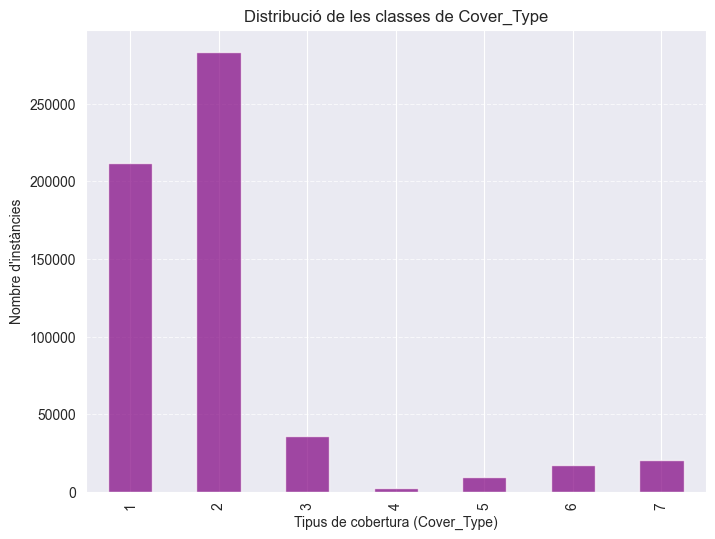

In [10]:
# Analitzar la distribució de la variable Cover_Type
cover_type_counts = df['Cover_Type'].value_counts().sort_index()

# Mostrar distribució
print("Distribució de Cover_Type:")
print(cover_type_counts)

# Visualització
plt.figure(figsize=(8, 6))
cover_type_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribució de les classes de Cover_Type')
plt.xlabel('Tipus de cobertura (Cover_Type)')
plt.ylabel('Nombre d\'instàncies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Es pot veure que les dades tenen una distribució desigual entre les diferents classes de **Cover_Type**. Això podria afectar el rendiment dels models de classificació, ja que alguns tipus de cobertura podrien tenir més mostres que d'altres. Això es veurà més endavant en l'entrenament dels models, com alguns que empren tècniques per a equilibrar les classes, tindran un millor resultat.

### 2.3 Gestió de valors nuls
Comprovarem si hi ha valors nuls en el conjunt de dades i, si és així, els gestionarem adequadament eliminant les files.


In [11]:
# Comprovar valors nuls
null_values = df.isnull().sum()
print("Valors nuls per columna:\n" + str(null_values))

# Eliminar files amb valors nuls
df.dropna(inplace=True)
print("Files amb valors nuls eliminades.")

Valors nuls per columna:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11    

### 2.4. Anàlisi de variables numèriques
Per a les variables numèriques, primerament analitzarem la seva distribució, emprant histogrames per a visualitzar la freqüència de cada característica.

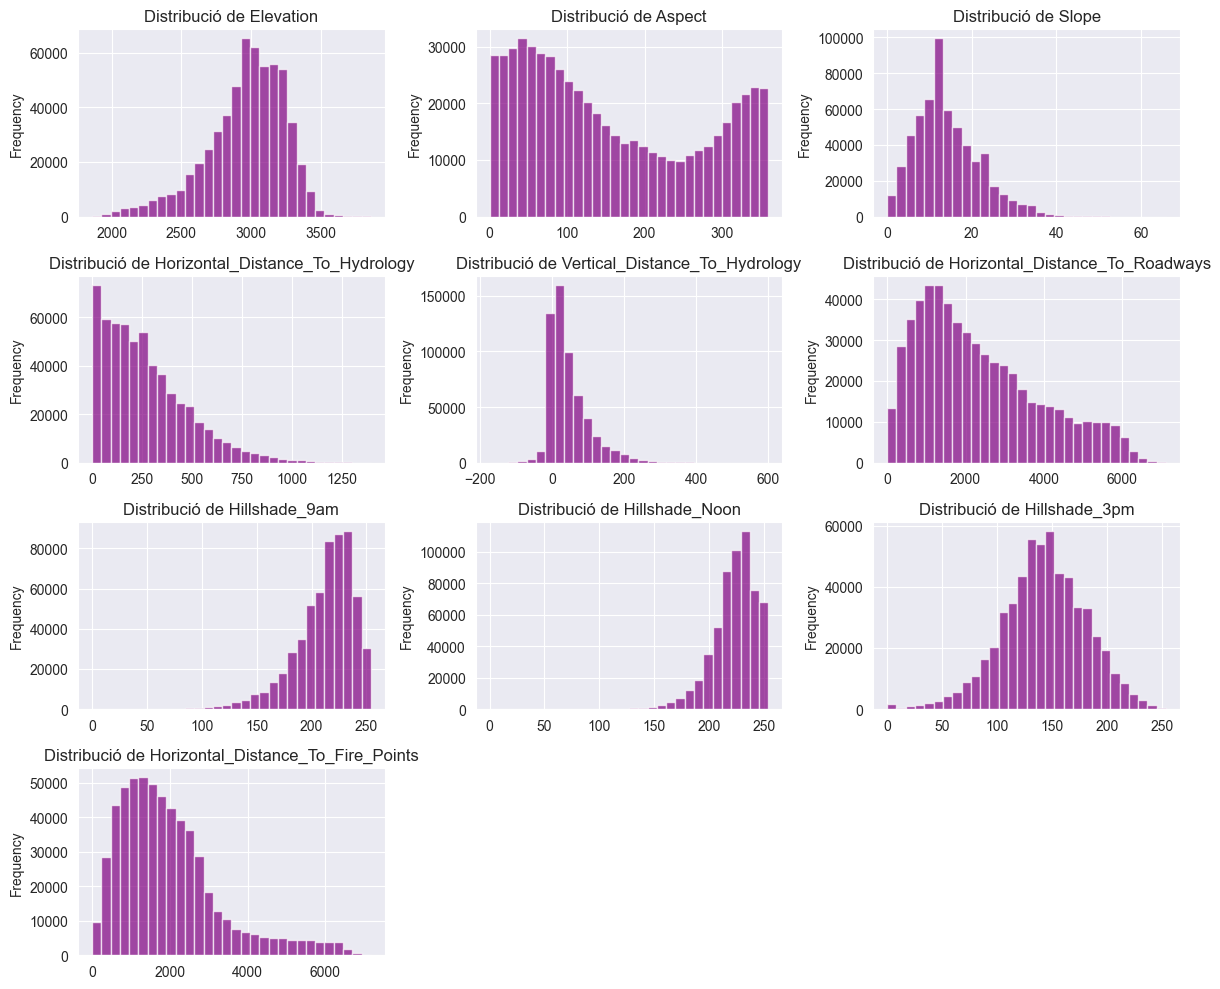

In [12]:
# Seleccionar les variables numèriques
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

# Crear un histograma per cada variable numèrica
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    df[col].plot(kind='hist', bins=30, color='purple', alpha=0.7)
    plt.title(f'Distribució de {col}')

plt.tight_layout()
plt.show()

1. **Elevation**:
   Distribució amb forma de campana, suggerint una distribució normal o gairebé normal.

2. **Aspect**:
   Distribució uniforme, amb valors repartits de manera homogènia en tot el rang.

3. **Slope**:
   Distribució esbiaixada cap a valors baixos, amb una cua cap a la dreta.

4. **Horizontal_Distance_To_Hydrology**:
   Distribució molt esbiaixada cap a valors baixos, amb una cua llarga cap a la dreta.

5. **Vertical_Distance_To_Hydrology**:
   Distribució esbiaixada cap a valors baixos, amb alguns valors negatius i una cua cap a la dreta.

6. **Horizontal_Distance_To_Roadways**:
   Distribució esbiaixada cap a valors baixos, però amb una cua més llarga i extensa.

7. **Hillshade_9am**:
   Distribució unimodal, amb un pic pronunciat cap als valors alts.

8. **Hillshade_Noon**:
   Distribució unimodal amb un pic moderat cap al centre del rang.

9. **Hillshade_3pm**:
   Distribució gairebé simètrica, amb un pic al centre del rang.

10. **Horizontal_Distance_To_Fire_Points**:
    Distribució esbiaixada cap a valors baixos, amb una cua llarga cap a la dreta.

No es poden identificar outliers ni valors anòmals. A continuació, visualitzarem els boxplots per a cada variable numèrica per a identificar possibles outliers.

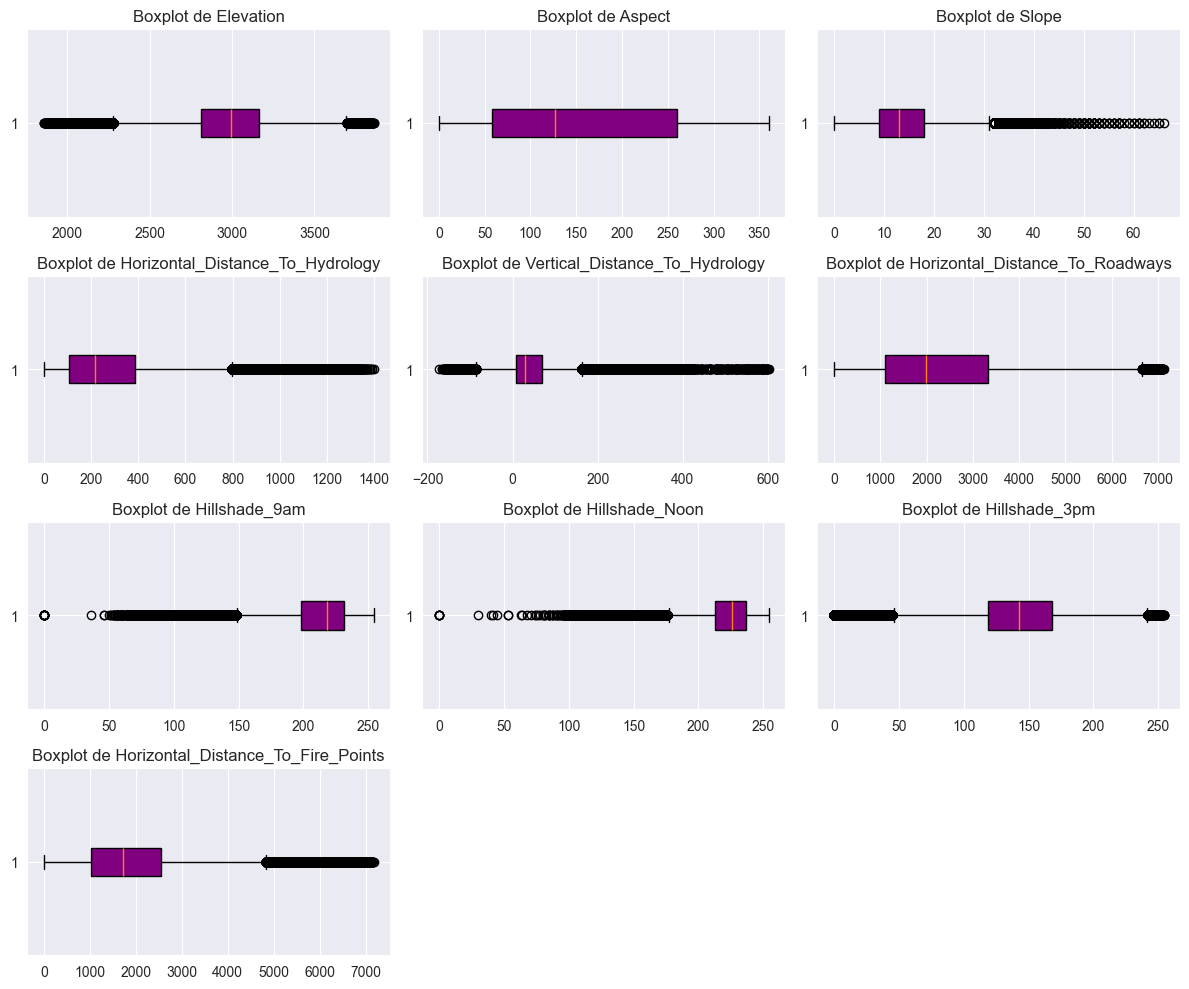

In [13]:
# Boxplot per identificar outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor="purple", color="black"))
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

Els boxplots mostren que algunes variables podrien contenir outliers, com ara **Vertical_Distance_To_Hydrology** i **Horizontal_Distance_To_Fire_Points**. Aquests outliers podrien afectar negativament el rendiment dels models. Tanmateix, no considerarem la seva eliminació per ara, ja que podrien ser valors vàlids.

A continuació, analitzarem les correlacions entre les variables numèriques per a identificar possibles relacions entre elles, el que podria ser útil per a descartar variables redundants.

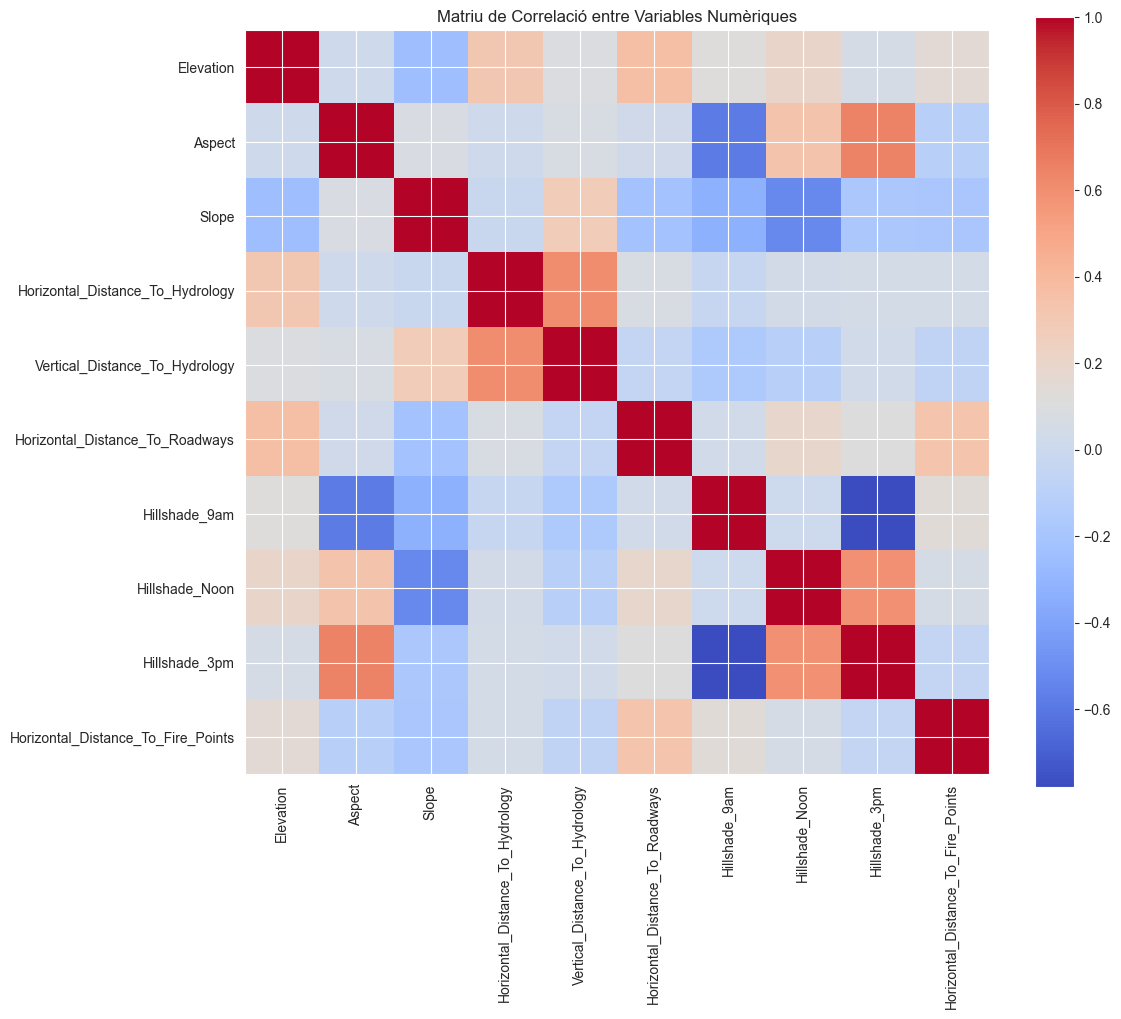

In [14]:
# Matriu de correlació
correlation_matrix = df[numerical_cols].corr()

# Visualitzar la matriu de correlació
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriu de Correlació entre Variables Numèriques')
plt.show()

La matriu de correlació mostra que hi ha algunes correlacions més significatives que altres, com ara entre **Hillshade_9am** i **Hillshade_3pm**, que tenen una correlació negativa. No obstant això, no hi ha correlacions molt altes entre les variables, cosa que podria indicar que cada variable aporta informació única i rellevant per a la classificació. Per això no eliminarem cap variable numèrica en aquest punt.

### 2.5. Anàlisi de variables categòriques
Per a les variables categòriques, analitzarem la seva distribució, cercant si hi ha variables amb valors constants o amb valors que només apareixen en un petit nombre de mostres, ja que això podria indicar que no són informatives per a la classificació, i per tant podrien ser eliminades. Aquestes variables categories són **Wilderness_Area1** a **Wilderness_Area4** i **Soil_Type1** a **Soil_Type40**, que ja han estat codificades com a variables binàries mitjançant codificació one-hot.

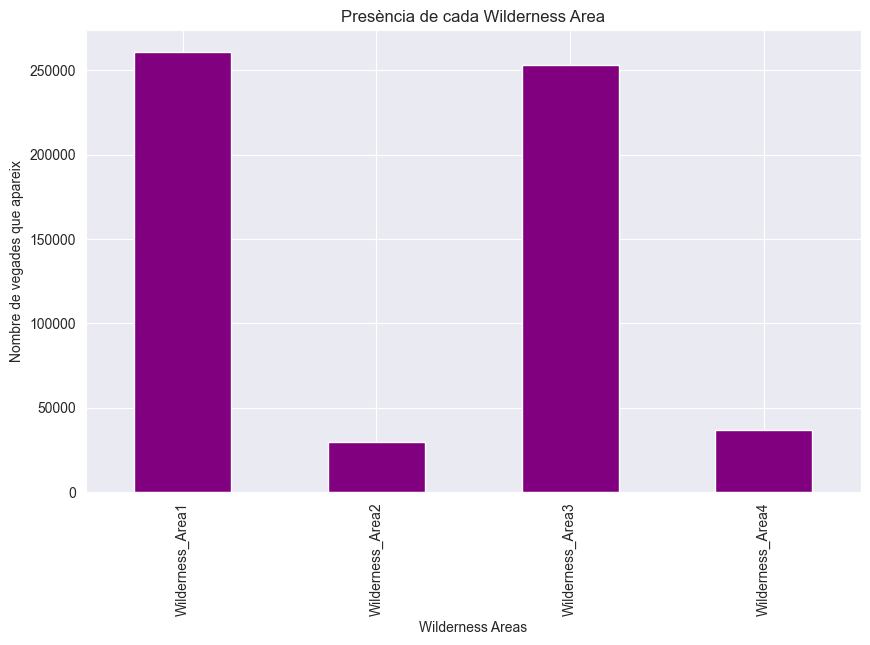

In [15]:
# Distribució de les àrees de bosc
wilderness_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
wilderness_data = df[wilderness_columns].sum()

# Visualitzar la presència de cada Wilderness_Area
plt.figure(figsize=(10, 6))
wilderness_data.plot(kind='bar', color='purple')
plt.xlabel("Wilderness Areas")
plt.ylabel("Nombre de vegades que apareix")
plt.title("Presència de cada Wilderness Area")
plt.show()

Veiem que totes les àrees de bosc tenen mostres en el conjunt de dades, per tant, totes aporten informació i no eliminarem cap.

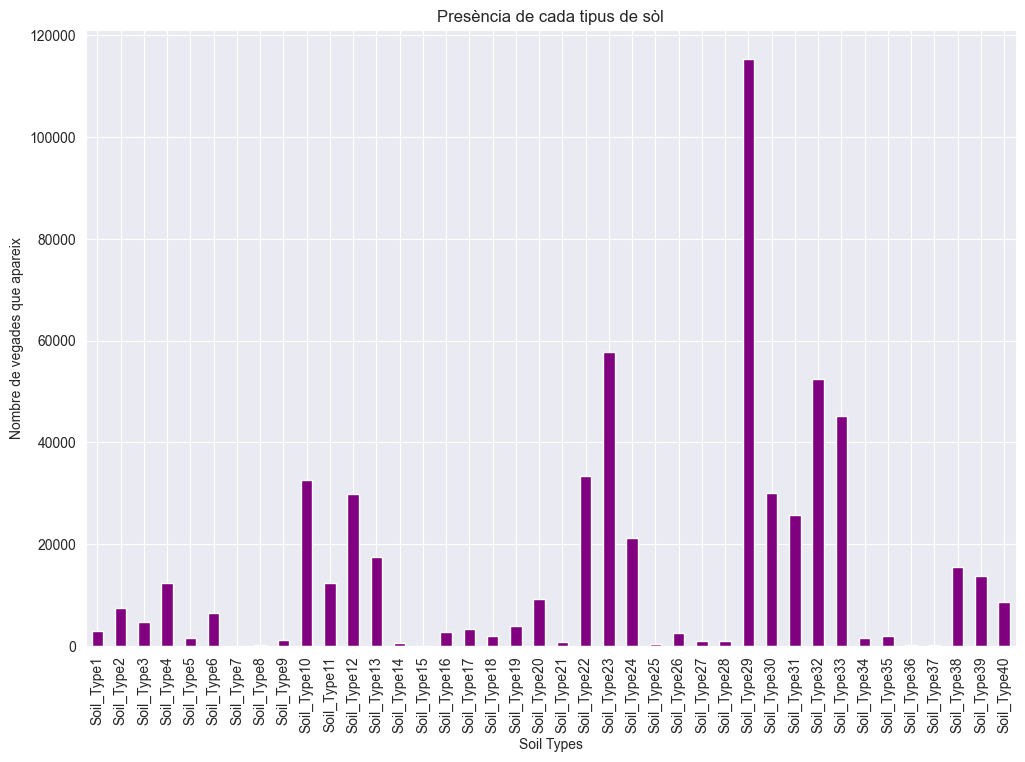

In [16]:
# Distribució dels tipus de sòl
soil_columns = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
                'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
                'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
                'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
                'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
soil_data = df[soil_columns].sum()

# Visualitzar la presència de cada tipus de sòl
plt.figure(figsize=(12, 8))
soil_data.plot(kind='bar', color='purple')
plt.xlabel("Soil Types")
plt.ylabel("Nombre de vegades que apareix")
plt.title("Presència de cada tipus de sòl")
plt.show()

Veiem que hi ha alguns tipus de sòl que tenen una presència molt baixa en el conjunt de dades, cosa que podria indicar que no són informatius per a la classificació. És el cas de **Soil_Type15** que només apareix en un petit nombre de mostres. Aquesta variable podria ser eliminada per simplificar el model sense perdre informació rellevant. N'hi ha altres que també tenen una presència baixa, però no els eliminarem per ara.

In [17]:
# Comptar mostres per Soil_Type15
soil_type15_count = df['Soil_Type15'].sum()

# Eliminar les files on Soil_Type15 és 1
df = df[df['Soil_Type15'] != 1]

# Eliminar la columna 'Soil_Type15' i eliminar de la llista de variables categòriques
df.drop('Soil_Type15', axis=1, inplace=True)
soil_columns.remove('Soil_Type15')

print(f"S'han eliminat {soil_type15_count} mostres amb Soil_Type15")

S'han eliminat 3 mostres amb Soil_Type15


### 2.6. Relació amb la variable objectiu
Per a analitzar la realció entre les variables numèriques amb la variable objectiu **Cover_Type**, emprarem gràfics de dispersió per a visualitzar com es distribueixen les mostres de cada classe en funció de les variables numèriques. Cerquem identificar si hi ha alguna relació clara entre les variables i la classe de cobertura forestal.

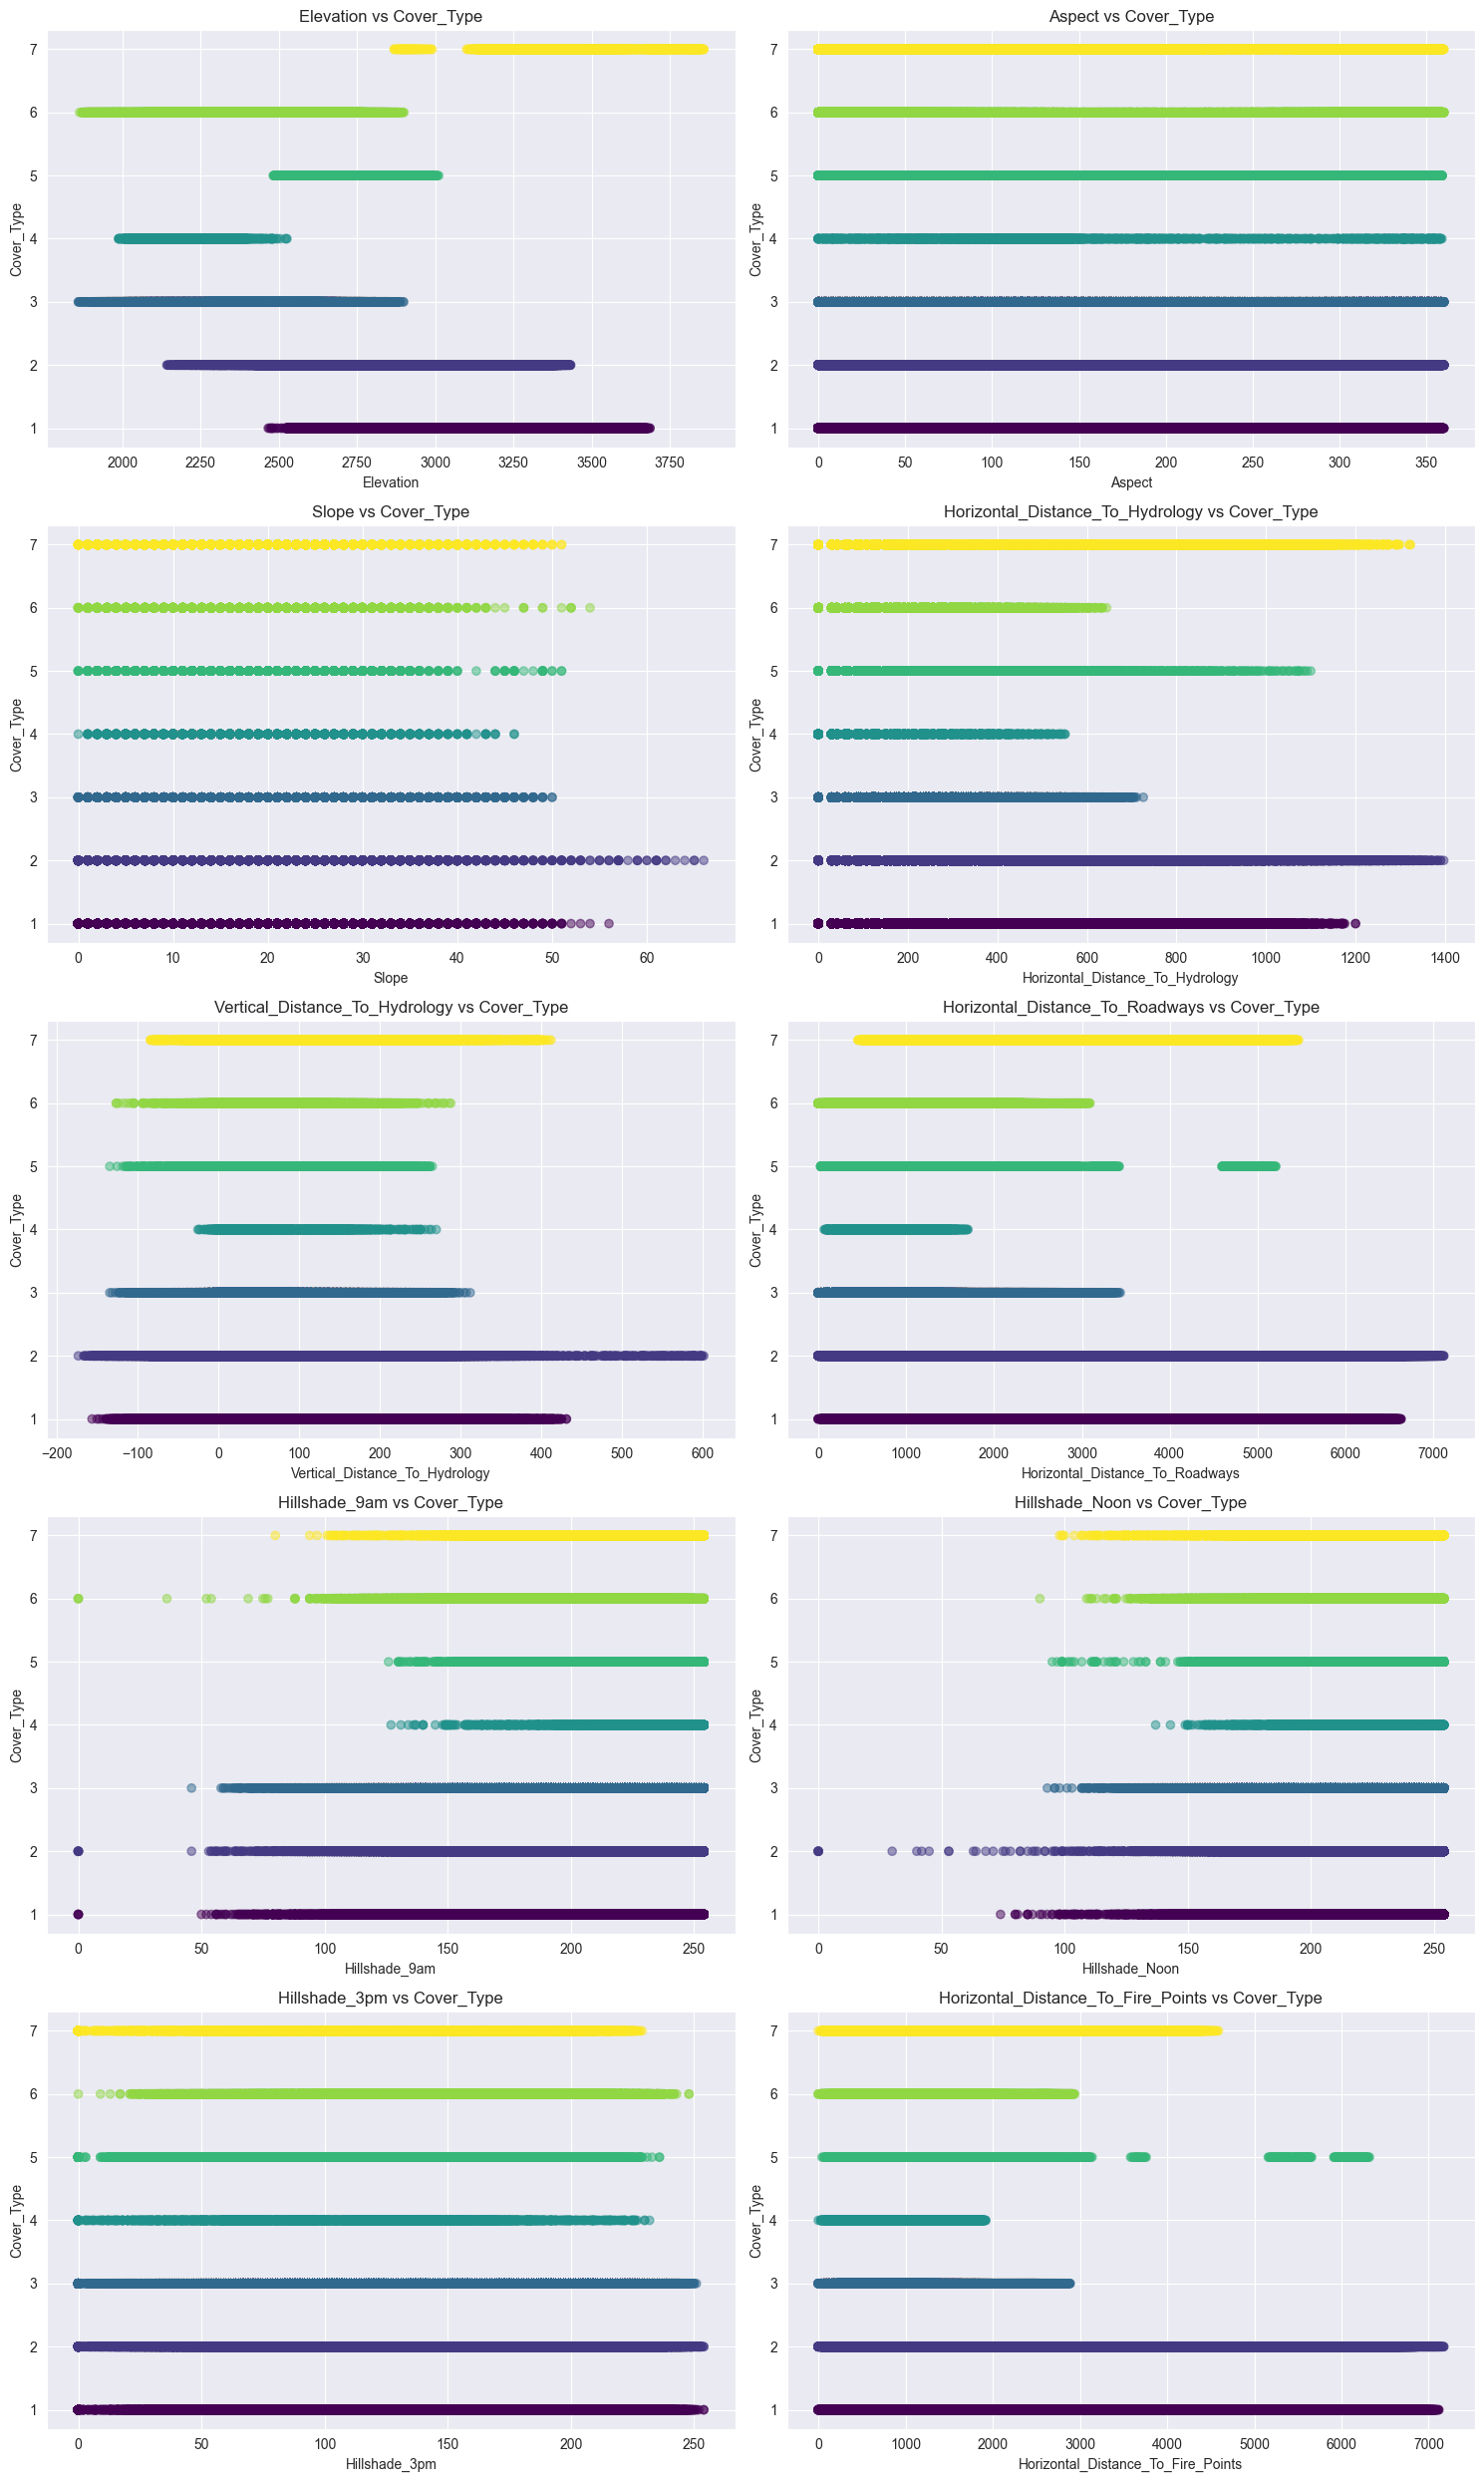

In [18]:
# Determinar la quantitat de files i columnes per als subgràfics
n = len(numerical_cols)
n_cols = 2
n_rows = int(np.ceil(n / n_cols))

# Crear una figura amb subgràfics
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Convertir axes a una llista unidimensional en cas que sigui 2D
axes = axes.flatten()

# Crear un gràfic de dispersió per cada variable numèrica
for i, col in enumerate(numerical_cols):
    axes[i].scatter(df[col], df['Cover_Type'], alpha=0.5, c=df['Cover_Type'], cmap='viridis')
    axes[i].set_title(f'{col} vs Cover_Type')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cover_Type')

# Ajustar l'espai entre subgràfics
plt.tight_layout()
plt.show()


Els gràfics de dispersió mostren que les diferents classes de **Cover_Type** es distribueixen de manera diferent en funció de les variables numèriques. Algunes variables, com **Elevation** i **Horizontal_Distance_To_Roadways**, semblen tenir una relació clara amb la classe de cobertura forestal, mentre que altres, com **Aspect** semblen tenir una distribució més uniforme. Gracies a aquesta anàlisi, podem eliminar aquesta variable que no aporta informació rellevant.

In [19]:
# Eliminar la variable 'Aspect'
df.drop('Aspect', axis=1, inplace=True)
numerical_cols.remove('Aspect')

Per a les variables categòriques, analitzarem la relació amb la variable objectiu **Cover_Type** el càlcul de la mitjana per a cada classe. Adicionalment visualitzarem la relació entre les variables categòriques binàries i la variable objectiu mitjançant un mapa de calor.

Mitjanes de Wilderness_Area per Cover_Type:
            Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4
Cover_Type                                                                        
1                   0.499042          0.087779          0.413180          0.000000
2                   0.516048          0.031715          0.441555          0.010681
3                   0.000000          0.000000          0.399955          0.600045
4                   0.000000          0.000000          0.000000          1.000000
5                   0.398293          0.000000          0.601707          0.000000
6                   0.000000          0.000000          0.439185          0.560815
7                   0.248708          0.112335          0.638957          0.000000

Mitjanes de Soil_Type per Cover_Type:
            Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
Cover_Type                                                               
1             0.000000

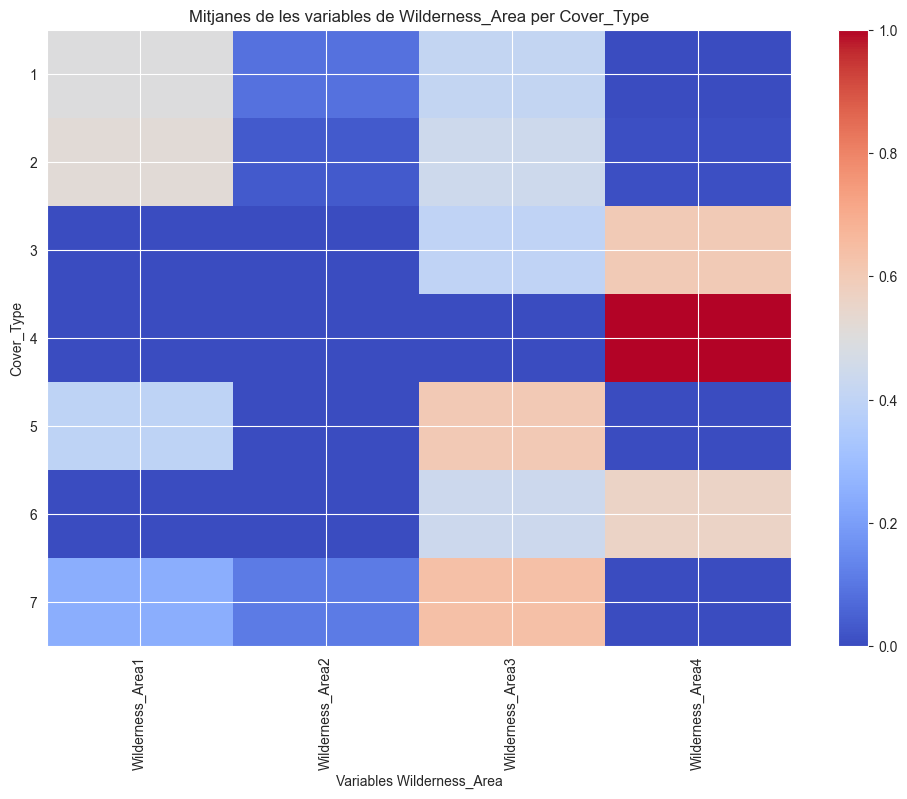

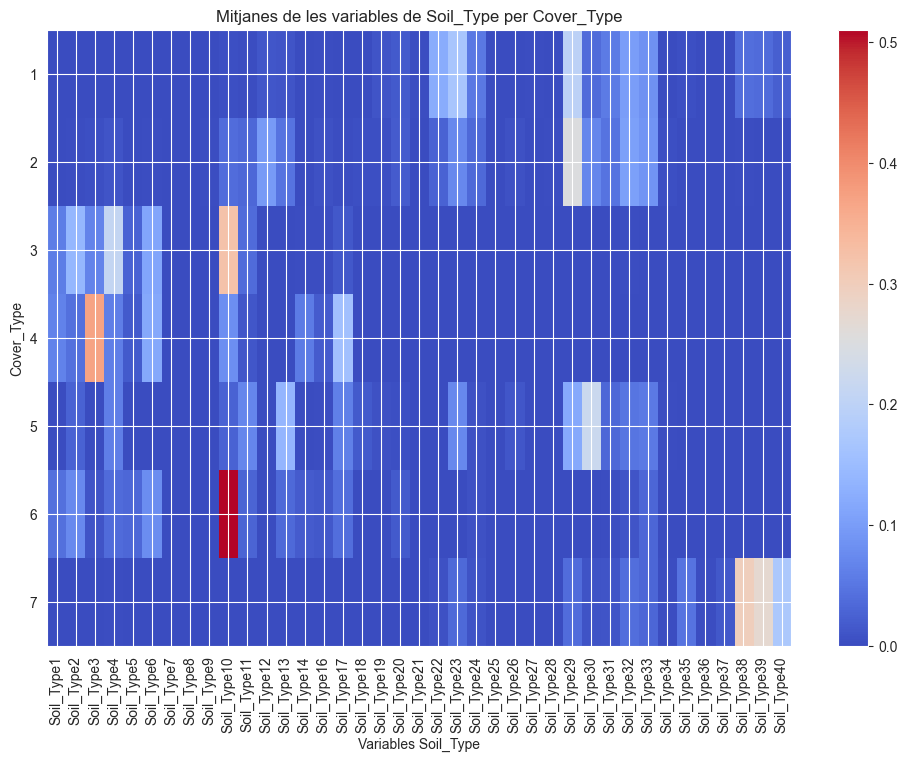

In [20]:
# Agrupar per Cover_Type i calcular la mitjana per cada variable de Wilderness
wilderness_means = df[wilderness_columns + ['Cover_Type']].groupby('Cover_Type').mean()

# Agrupar per Cover_Type i calcular la mitjana per cada variable de Soil
soil_means = df[soil_columns + ['Cover_Type']].groupby('Cover_Type').mean()

# Mostrar els resultats
print("Mitjanes de Wilderness_Area per Cover_Type:")
print(wilderness_means.to_string())
print("\nMitjanes de Soil_Type per Cover_Type:")
print(soil_means)

# Gràfic de calor per visualitzar les mitjanes de les variables de Wilderness_Area
plt.figure(figsize=(12, 8))
plt.imshow(wilderness_means, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.xticks(range(len(wilderness_means.columns)), wilderness_means.columns, rotation=90)
plt.yticks(range(len(wilderness_means.index)), wilderness_means.index)
plt.colorbar()

plt.title('Mitjanes de les variables de Wilderness_Area per Cover_Type')
plt.xlabel('Variables Wilderness_Area')
plt.ylabel('Cover_Type')
plt.show()

# Gràfic de calor per visualitzar les mitjanes de les variables de Soil_Type
plt.figure(figsize=(12, 8))
plt.imshow(soil_means, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.xticks(range(len(soil_means.columns)), soil_means.columns, rotation=90)
plt.yticks(range(len(soil_means.index)), soil_means.index)
plt.colorbar()

plt.title('Mitjanes de les variables de Soil_Type per Cover_Type')
plt.xlabel('Variables Soil_Type')
plt.ylabel('Cover_Type')
plt.show()

Aquests gràfics de calor mostra com les diferents classes de **Cover_Type** tenen valors mitjans diferents per a les variables binàries. Això indica que les variables categòriques són informatives per a la classificació i no eliminarem. A més, ens mostra resultats interessants com que el **Wilderness_Area4** té una relació molt forta amb la classe 4. Com a resultat d'aquesta anàlisi, no eliminarem cap variable categòrica.

### 2.7. Reducció de la dimensionalitat
Emprarem una tècnica de submostreig per a reduir la dimensionalitat de les dades i simplificar els models. Aquesta tècnica consisteix a eliminar mostres de les classes majoritàries per a igualar el nombre de mostres de les classes minoritàries. Això pot millorar el rendiment dels models, especialment en casos de classes desequilibrades. Hem decidit fer servir aquesta tècnica en lloc de la tècnica de sobre mostreig per a evitar el sobre ajustament dels models.

In [21]:
# Submostreig de les dades
undersample_df = df.copy()
undersample_size = undersample_df['Cover_Type'].value_counts().min()
subsets = [undersample_df[undersample_df['Cover_Type'] == i].sample(undersample_size, random_state=seed) for i in range(1, 8)]
undersample_df = pd.concat(subsets).sample(frac=1.0, random_state=seed).reset_index(drop=True)

# Mostrar la mida de cada classe després del submostreig
print("Mida de cada classe després del submostreig:")
print(undersample_df['Cover_Type'].value_counts())

Mida de cada classe després del submostreig:
Cover_Type
1    2747
5    2747
7    2747
3    2747
6    2747
2    2747
4    2747
Name: count, dtype: int64


> ⚠️ Al final hem decidit no fer servir submostreig, ja que hem detectat que l'eficiència dels models disminuïa considerablement, tot i que el temps d'entrenament s es veia significativament reduït. Per millorar el temps d'execució hem pres altres mesures pels models amb més càrrega computacional, com ara reduir les combinacions d'hiperparàmetres a cercar.

A continucació farem servir l'anàlisi de components principals (PCA) per a reduir la dimensionalitat de les dades i identificar els components més importants que expliquen la variança del conjunt de dades. Això ens permetrà reduir el nombre de variables i simplificar els models sense perdre informació rellevant. Primerament, estandaritzarem les dades perquè totes tinguin mitjana zero i desviació estàndard d'1, i després aplicarem PCA per a reduir la dimensionalitat. Finalment, determinarem el nombre òptim de components que expliquen almenys el 95% de la variança.

Això ens permetrà millorar el rendiment dels models i reduir el temps de càlcul.


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estadístiques del submostreig
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Estandarditzar les dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA().fit(X_scaled)

# Variant explicada acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()

# Determinar el nombre de components que capturen al manco el 95% de la variant
n_components = next(i for i, total_var in enumerate(explained_variance) if total_var >= 0.95) + 1

print(f"Número óptimo de componentes: {n_components}")

# Aplicar PCA amb el nombre òptim de components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Número óptimo de componentes: 42


### 2.8. Divisió de les dades
Finalment, dividirem les dades en conjunts d'entrenament i prova per a l'entrenament dels models. Utilitzarem un 80% de les dades per a l'entrenament i un 20% per a la prova. El conjunt d'entrenament es farà servir per a ajustar els models, mentre que el conjunt de proves es farà servir per a avaluar el seu rendiment. Emprem la funció `train_test_split` de la llibreria **scikit-learn** per a realitzar la divisió, fixant una llavor aleatòria per a garantir la reproducibilitat dels resultats.

In [23]:
# Dividir les dades en conjunts d'entrenament i prova
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=seed)

print("Conjunt d'entrenament:", X_train.shape, y_train.shape)
print("Conjunt de prova:", X_test.shape, y_test.shape)

Conjunt d'entrenament: (464807, 42) (464807,)
Conjunt de prova: (116202, 42) (116202,)


# 3. Entrenament i resultats per a cada model
En aquesta secció, entrenarem diversos models d'aprenentatge automàtic per a la classificació de les dades i avaluarem els seus resultats. Compararem els següents models:

- **Perceptró**
- **Regressió logística**
- **Màquines de vectors de suport (SVM)**
- **Arbres de decisió**
- **Boscos aleatoris**

Per a cada model, realitzarem els següents passos:

1. Entrenament del model
2. Predicció amb les dades de prova
3. Avaluació del rendiment del model

Per comançar, importarem les llibreries comunes necessàries per a l'entrenament i avaluació de tots els models.

In [24]:
# Llibreries per a l'evaluació dels models
from sklearn.metrics import classification_report

# Llibreries per a la cerca d'hiperparàmetres
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


### 3.1. Perceptró
#### Entrenament del Perceptró
Primerament, entrenarem un model de Perceptró per a la classificació de les dades. El Perceptró és un classificador lineal que intenta trobar una línia de separació entre les diferents classes. Un percetró és un tipus de classificador binari, en aquest cas, farem servir la implementació de **scikit-learn** que permet la classificació multiclasse. Primerament, cercarem els millors hiperparàmetres per al model amb validació creuada.
- **max_iter**: Nombre màxim d'iteracions per a la convergència.
- **tol**: Tolerància per a la parada del criteri.
- **random_state**: Llavor aleatòria per a la reproducibilitat.
- **class_weight**: Pesos associats a les classes. Si és 'balanced', ajusta els pesos inversament proporcionalment a les freqüències de les classes.

In [25]:
from sklearn import linear_model

# Definir els hiperparàmetres a cercar
param_grid = {
    'max_iter': [1000],
    'tol': [1e-3, 1e-4, 1e-5],
    'random_state': [seed],
    'class_weight': ['balanced', None],
}

# Cerca d'hiperparàmetres amb validació creuada
clf_perceptron = linear_model.Perceptron()
grid_search_perceptron = GridSearchCV(clf_perceptron, param_grid, cv=5, n_jobs=-1, scoring=scoring, verbose=2)
grid_search_perceptron.fit(X_train, y_train)

# Millors hiperparàmetres
best_params_perceptron = grid_search_perceptron.best_params_
best_perceptron = grid_search_perceptron.best_estimator_

print("Millors hiperparàmetres per al Perceptró:", best_params_perceptron)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Millors hiperparàmetres per al Perceptró: {'class_weight': None, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001}


#### Predicció del Perceptró
Obtindrem les prediccions del model de Perceptró utilitzant les dades de prova. A continuació, avaluarem el rendiment del model utilitzant diverses mètriques, com ara la precisió, la recuperació i el punt de f1.


              precision    recall  f1-score   support

           1       0.60      0.63      0.61     42504
           2       0.67      0.65      0.66     56532
           3       0.69      0.55      0.61      7122
           4       0.39      0.37      0.38       541
           5       0.09      0.17      0.12      1986
           6       0.36      0.16      0.22      3460
           7       0.50      0.56      0.53      4057

    accuracy                           0.61    116202
   macro avg       0.47      0.44      0.45    116202
weighted avg       0.62      0.61      0.61    116202



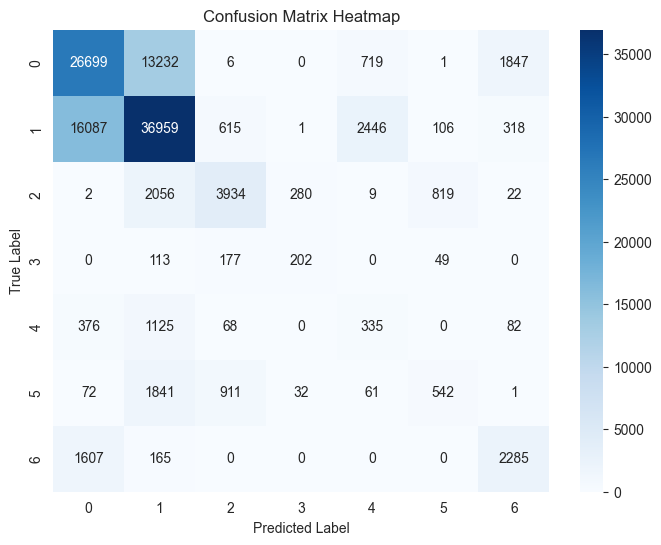

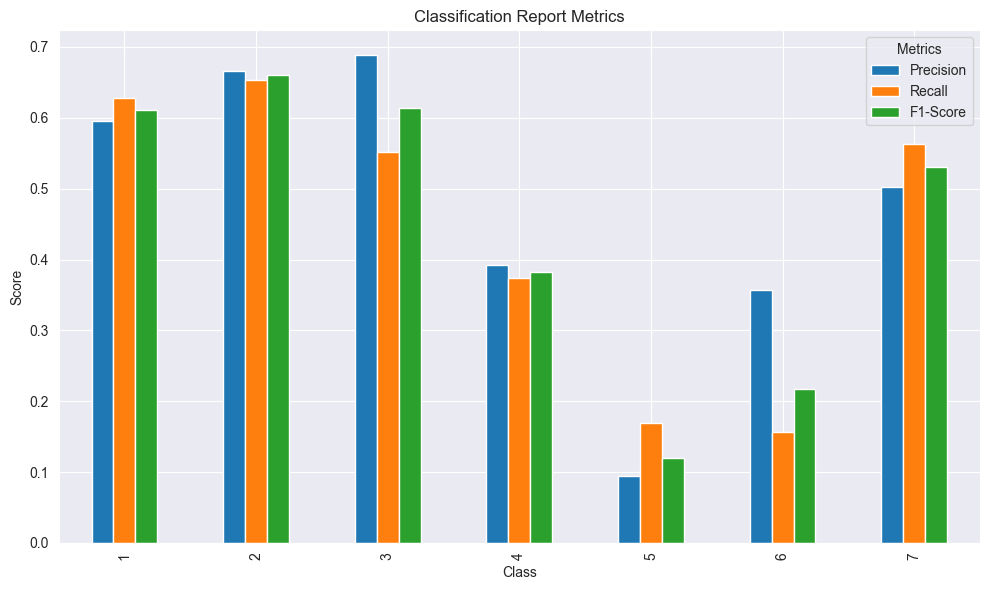

In [29]:
# Fer prediccions amb el Perceptró
pred_perceptron = best_perceptron.predict(X_test)

report_print = classification_report(y_test, pred_perceptron)
report = classification_report(y_test, pred_perceptron,output_dict=True)

# Avaluació del rendiment del Perceptró
print(report_print)

cm = confusion_matrix(y_test, pred_perceptron)

# Crear el heatmap con seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Crear un DataFrame con las métricas
report_df = pd.DataFrame(report).transpose()

# Filtrar solo las clases (excluir 'accuracy', 'macro avg', 'weighted avg')
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Seleccionar las columnas de interés
report_df = report_df[['precision', 'recall', 'f1-score']]

# Renombrar columnas para mayor claridad
report_df.columns = ['Precision', 'Recall', 'F1-Score']

# Crear un único gráfico de barras con todas las clases y métricas
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

#### Avaluació del Perceptró

Com era d'esperar, el model de Perceptró no ofereix un rendiment òptim per a aquest conjunt de dades. Això es deu a la seva simplicitat i a la seva limitació a la divisió lineal de les dades. A continuació, provarem amb altres models més sofisticats per a veure si milloren el rendiment.

Podem veure com el model es comporta amb les diferents classes. Les classes amb major representació tenen un rendiment més alt, com era d'esperar. Això es deu a la seva major quantitat de mostres, que permeten al model aprendre millor els seus patrons. A més, estem cercant un major accuracy a la tria de hiperparàmetres, per tant, el model s'ajusta millor a les classes majoritàries.



### 3.2. Regressió logística
Aquest és un altre model de classificació lineal que utilitza la funció logística per a predir la probabilitat de pertànyer a una classe. Aquest model és més flexible que el Perceptró, permet la classificació multiclasse, però està pensat per a problemes de classificació binària.

#### Entrenament de la Regressió logística
Entrenarem un model de Regressió logística utilitzant les dades d'entrenament.

In [30]:
from sklearn.metrics import accuracy_score
# Entrenament de la Regressió logística
from sklearn.linear_model import LogisticRegression

# Definir el modelo
logreg = LogisticRegression(max_iter=2000, random_state=seed)

# Definir el espacio de búsqueda
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'newton-cg'],
    'C': [0.01, 0.1, 1, 10, 100]  # Valores de regularización
}

# Crear lista de parámetros filtrados (manual check)
valid_params = []
for solver in param_grid['solver']:
    for C in param_grid['C']:
        for penalty in param_grid['penalty']:
            if solver == 'newton-cg' and penalty == 'l1':
                continue  # Evitar combinación inválida
            valid_params.append({'solver': [solver], 'C': [C], 'penalty': [penalty]})

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=valid_params,
    scoring='accuracy',
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Utilizar todos los núcleos disponibles
    error_score='raise'  # Lanza un error si hay combinaciones inválidas
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)
# Resultados
print(f"Millor combinació d'hiperparàmetres: {grid_search.best_params_}")
print(f"Millor precisió obtinguda durant Grid Search: {grid_search.best_score_:.4f}")

# Evaluar el modelo
pred_log = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, pred_log)
print(f"Precisió amb el conjunt de test: {accuracy:.4f}")

report_print = classification_report(y_test, pred_log)
report = classification_report(y_test, pred_log,output_dict=True)

# Avaluació del rendiment del Perceptró
print(report_print)

cm = confusion_matrix(y_test, pred_log)

# Crear el heatmap con seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Crear un DataFrame con las métricas
report_df = pd.DataFrame(report).transpose()

# Filtrar solo las clases (excluir 'accuracy', 'macro avg', 'weighted avg')
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Seleccionar las columnas de interés
report_df = report_df[['precision', 'recall', 'f1-score']]

# Renombrar columnas para mayor claridad
report_df.columns = ['Precision', 'Recall', 'F1-Score']

# Crear un único gráfico de barras con todas las clases y métricas
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 3.3. Màquines de vectors de suport (SVM)


In [21]:
from sklearn.svm import SVC
# C, gamma,shrinking, break ties, random state
svm = SVC(random_state=seed)

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'C': [0.1, 1, 10, 100],                  # Regularización
    'gamma': ['scale', 'auto', 0.1, 1, 10], # Control de influencia de cada punto
    'shrinking': [True, False],         # Activar/desactivar heurística de optimización
    'break_ties': [True, False]         # Desempate en predicciones multiclase
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Evaluar el modelo
pred_svm = grid_search.predict(X_test)
# Resultados
print(f"Mejor combinación de hiperparámetros: {grid_search.best_params_}")
print(f"Mejor precisión obtenida: {grid_search.best_score_:.4f}")

accuracy = accuracy_score(y_test, pred_svm)
print(f"Precisión en test: {accuracy:.4f}")

report_print = classification_report(y_test, pred_svm)
report = classification_report(y_test, pred_svm,output_dict=True)

# Avaluació del rendiment del Perceptró
print(report_print)

cm = confusion_matrix(y_test, pred_svm)

# Crear el heatmap con seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Crear un DataFrame con las métricas
report_df = pd.DataFrame(report).transpose()

# Filtrar solo las clases (excluir 'accuracy', 'macro avg', 'weighted avg')
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Seleccionar las columnas de interés
report_df = report_df[['precision', 'recall', 'f1-score']]

# Renombrar columnas para mayor claridad
report_df.columns = ['Precision', 'Recall', 'F1-Score']

# Crear un único gráfico de barras con todas las clases y métricas
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

### 3.4. Arbres de decisió
Els arbres de decisió són models no lineals que divideixen les dades en subconjunts més petits basant-se en característiques específiques. Aquest model és més flexible que els models lineals, ja que pot capturar relacions no lineals entre les característiques i la variable objectiu. Entrenarem un model d'arbres de decisió utilitzant les dades d'entrenament.
#### Entrenament del model
Cerquem els millors hiperparàmetres per a l'arbre de decisió amb validació creuada. Això ens permetrà trobar la combinació òptima de paràmetres que millorin el rendiment del model.:
- **criterion**: Funció per a mesurar la qualitat de la divisió. L'entropia és una mesura de la incertesa de les dades, mentre que el Gini és una mesura de la impuresa dels nodes.
- **max_depth**: Profunditat màxima de l'arbre. Si no es defineix, els nodes s'expandeixen fins a contenir les fulles o fins a contenir min_samples_split, afectant críticament el rendiment del model.
- **min_samples_split**: Nombre mínim de mostres requerides per a dividir un node intern. Aquest paràmetre ofereix una major precisió per classificar les mostres.
- **min_samples_leaf**: Nombre mínim de mostres requerides en cada fulla. Aquest paràmetre ofereix una manera de prevenir l'ajustament excessiu.

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Definir els hiperparàmetres a cercar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 50, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

# Cerca d'hiperparàmetres amb validació creuada
clf_tree = DecisionTreeClassifier(random_state=seed)
grid_search_tree = GridSearchCV(clf_tree, param_grid, cv=5, n_jobs=-1, scoring=scoring, verbose=2)
grid_search_tree.fit(X_train, y_train)

# Millors hiperparàmetres
best_params_tree = grid_search_tree.best_params_
best_tree = grid_search_tree.best_estimator_

print("Millors hiperparàmetres per a l'arbre de decisió:", best_params_tree)
print("Precisió mitjana de la validació creuada:", grid_search_tree.best_score_)

Millors hiperparàmetres per a l'arbre de decisió: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisió mitjana de la validació creuada: 0.9056382586905519


#### Predicció de l'arbre de decisió
A continuació, farem prediccions amb l'arbre de decisió utilitzant les dades de prova. Avaluarem el rendiment del model utilitzant diverses mètriques, com ara la precisió, la recuperació i el punt de f1.

In [26]:
# Fer prediccions amb l'arbre de decisió
pred_tree = best_tree.predict(X_test)

report_print = classification_report(y_test, pred_tree)
report = classification_report(y_test, pred_tree,output_dict=True)

# Avaluació del rendiment del Perceptró
print(report_print)

cm = confusion_matrix(y_test, pred_tree)

# Crear el heatmap con seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Crear un DataFrame con las métricas
report_df = pd.DataFrame(report).transpose()

# Filtrar solo las clases (excluir 'accuracy', 'macro avg', 'weighted avg')
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Seleccionar las columnas de interés
report_df = report_df[['precision', 'recall', 'f1-score']]

# Renombrar columnas para mayor claridad
report_df.columns = ['Precision', 'Recall', 'F1-Score']

# Crear un único gráfico de barras con todas las clases y métricas
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           1       0.91      0.91      0.91     42504
           2       0.93      0.93      0.93     56532
           3       0.90      0.90      0.90      7122
           4       0.77      0.78      0.77       541
           5       0.80      0.78      0.79      1986
           6       0.81      0.81      0.81      3460
           7       0.93      0.92      0.93      4057

    accuracy                           0.91    116202
   macro avg       0.86      0.86      0.86    116202
weighted avg       0.91      0.91      0.91    116202



#### Avaluació de l'arbre de decisió
El model d'arbres de decisió ofereix un rendiment notablement millor que els models linears anteriors. Això es deu a la seva capacitat per a capturar relacions no lineals entre les característiques i la variable objectiu. Aquest model és més flexible i pot ajustar-se millor a les dades, millorant el rendiment de la classificació.

### 3.5. Boscos aleatoris
Els boscos aleatoris són un conjunt d'arbres de decisió que treballen de forma conjunta per a millorar el rendiment de la classificació. Aquest model crea diversos arbres de decisió i promitja les seves prediccions per a millorar la precisió i reduir l'ajustament excessiu. Entrenarem un model de boscos aleatoris utilitzant les dades d'entrenament.
#### Entrenament del model
Cerquem els millors hiperparàmetres per al bosc aleatori amb validació creuada. Això ens permetrà trobar la combinació òptima de paràmetres que millorin el rendiment del model.
- **n_estimators**: Nombre d'arbres a utilitzar en el bosc aleatori. Un nombre més gran d'arbres pot millorar el rendiment del model, però també augmenta el temps de càlcul.
- **max_features**: Nombre màxim de característiques a considerar per a cada divisió. Aquest paràmetre pot afectar la variància i la correlació entre els arbres.
- **max_depth**: Profunditat màxima de cada arbre. Si no es defineix, els nodes s'expandeixen fins a contenir les fulles o fins a contenir min_samples_split, afectant críticament el rendiment del model.
- **min_samples_split**: Nombre mínim de mostres requerides per a dividir un node intern. Aquest paràmetre ofereix una major precisió per classificar les mostres.
- **min_samples_leaf**: Nombre mínim de mostres requerides en cada fulla. Aquest paràmetre ofereix una manera de prevenir l'ajustament excessiu.
- **criterion**: Funció per a mesurar la qualitat de la divisió. L'entropia és una mesura de la incertesa de les dades, mentre que el Gini és una mesura de la impuresa dels nodes.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Definir els hiperparàmetres a cercar
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt'],
    'max_depth': [20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['entropy']
}

# Cerca d'hiperparàmetres amb validació creuada
clf_forest = RandomForestClassifier(random_state=seed)
grid_search_forest = GridSearchCV(clf_forest, param_grid, cv=5, n_jobs=-1, scoring=scoring, verbose=2)
grid_search_forest.fit(X_train, y_train)

# Millors hiperparàmetres
best_params_forest = grid_search_forest.best_params_
best_forest = grid_search_forest.best_estimator_

print("Millors hiperparàmetres per al bosc aleatori:", best_params_forest)
print("Precisió mitjana de la validació creuada:", grid_search_forest.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Millors hiperparàmetres per al bosc aleatori: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precisió mitjana de la validació creuada: 0.9467520928489177


#### Predicció del bosc aleatori
A continuació, farem prediccions amb el bosc aleatori utilitzant les dades de prova. Avaluarem el rendiment del model utilitzant diverses mètriques, com ara la precisió, la recuperació i el punt de f1.

In [30]:
# Fer prediccions amb el bosc aleatori
pred_forest = best_forest.predict(X_test)

report_print = classification_report(y_test, pred_forest)
report = classification_report(y_test, pred_forest,output_dict=True)

# Avaluació del rendiment del Perceptró
print(report_print)

cm = confusion_matrix(y_test, pred_forest)

# Crear el heatmap con seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Crear un DataFrame con las métricas
report_df = pd.DataFrame(report).transpose()

# Filtrar solo las clases (excluir 'accuracy', 'macro avg', 'weighted avg')
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Seleccionar las columnas de interés
report_df = report_df[['precision', 'recall', 'f1-score']]

# Renombrar columnas para mayor claridad
report_df.columns = ['Precision', 'Recall', 'F1-Score']

# Crear un único gráfico de barras con todas las clases y métricas
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42504
           2       0.95      0.97      0.96     56532
           3       0.92      0.95      0.94      7122
           4       0.89      0.78      0.83       541
           5       0.92      0.78      0.85      1986
           6       0.91      0.86      0.88      3460
           7       0.97      0.95      0.96      4057

    accuracy                           0.95    116202
   macro avg       0.93      0.89      0.91    116202
weighted avg       0.95      0.95      0.95    116202



#### Avaluació del bosc aleatori
El model de bosc aleatori ofereix un rendiment excepcional per a aquest conjunt de dades. Aquest model és capaç de capturar relacions no lineals entre les característiques i la variable objectiu, millorant significativament el rendiment de la classificació. Aquest model és més robust i pot ajustar-se millor a les dades, millorant la precisió i la recuperació de les prediccions. Els boscos aleatoris són una eina potent per a la classificació de dades i són àmpliament utilitzats en la pràctica per a la seva precisió i rendiment. El punt negatiu és que el model és més complex i pot requerir més temps de càlcul que altres models més senzills, com els arbres de decisió.

# 4. Conclusió
